#  Machine Learning Based Loan Approval System: 

### Creation of a prediction model to tackle and address a very common problem in the Banking industry. "To approve or to reject the loan application?" . Since there is a vast number of applications being filed everyday, having a predictive model to help the executives to do their job by giving them a heads up about approval or rejection of a new loan application.

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
#Reading the dataset
import pandas as pd
import numpy as np

In [4]:
Loandata = pd.read_csv(r'C:\Users\yohaa\OneDrive\Desktop\Internship Applicant Dev\Loan_Approval_Data.csv')

## DATA PRE-PROCESSING:
Start of the process of cleaning of the data, removing of duplicate values.

In [5]:
#Removing duplicate rows if any
print('Shape before deleting values: ', Loandata.shape)
Loandata = Loandata.drop_duplicates()
print('Shape after deleting duplicate values: ', Loandata.shape)

Shape before deleting values:  (614, 13)
Shape after deleting duplicate values:  (614, 13)


In [6]:
#Printing sample data
#Start observing the Quantitative / Categorical / Qualitative variables
Loandata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Defining problem statement:

Since the model to be created is one to predict whether to approve the loan application or not? 
### Target Variable = Loan_Status 
### Predictors: Gender, Married, Dependents, Education, Self_employed, Applicant income, Co applicant income, Loanamount, Loan_amount_term, Credit_history,Property_area

<AxesSubplot: xlabel='Loan_Status'>

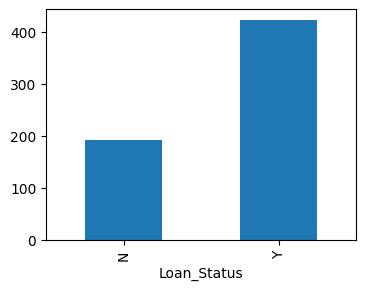

In [7]:
# Target Variable = Loan_status
#Predictors = Gender, Married, Dependents, Education, Self_employed, Applicant income, Co applicant income, Loanamount, Loan_amount_term, Credit_history,Property_area

#Loan_status = "N" means the loan was rejected
#Loan_status = "Y" means the loan was approved

#Target variable is categorical

%matplotlib inline
#Creating a bar chart as the target variable is categorical
GroupedData = Loandata.groupby('Loan_Status').size()
GroupedData.plot(kind = 'bar', figsize = (4,3))

## Data exploration:
Here, we gauge the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Categorical or Qualitative.

This step helps in the column rejection process i.e, identify if a certain column will affect the target variable or not.

In [8]:
Loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


Info() gives us a summarized information of the data, gives us a basic idea which columns have null values and which don't.

In [9]:
Loandata.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


describe() gives us the descriptive statistics of the data

In [10]:
Loandata.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Using nunique() to find number of unique values in each column. We use this to understand whih columns are categorical and which is continuous. Typically if the number of unique values are < 20 then the variable is likely to be categorical otherwise continuous.

Loan_Id , ApplicantIncome, CoapplicantIncome, LoanAmount-> high number of unique values -> Qualitative(Continuous)

Gender, Married , Dependents, Education, Self Employed, Credit_History, Property_ Area, Loan_ Status -> less number of unique values -> Categorical

## Results from Data Exploration: 
We reject Loan_ID as this column does not affect the loan approval or rejection. The remaining columns need to be trated for missing values if there are any.

## Removing useless variables from the data:

In [11]:
UselessColumns = ['Loan_ID']
Loandata = Loandata.drop(UselessColumns,axis=1)
Loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### It can be seen that the unwanted column being Loan_ID has been removed.

## Visual Exploratory Data Analysis:

From the data exploration done, we have 8 categorical predictors in the data i.e;

1. Gender
2. Married
3. Dependents
4. Education
5. Self_Employed
6. Loan_Amount_Term
7. Credit_History
8. Property_Area

Now we use bar charts to see how the data is distributed for these categorical columns.

Creating a function to plot multiple bar charts at once for all the categorical variables.

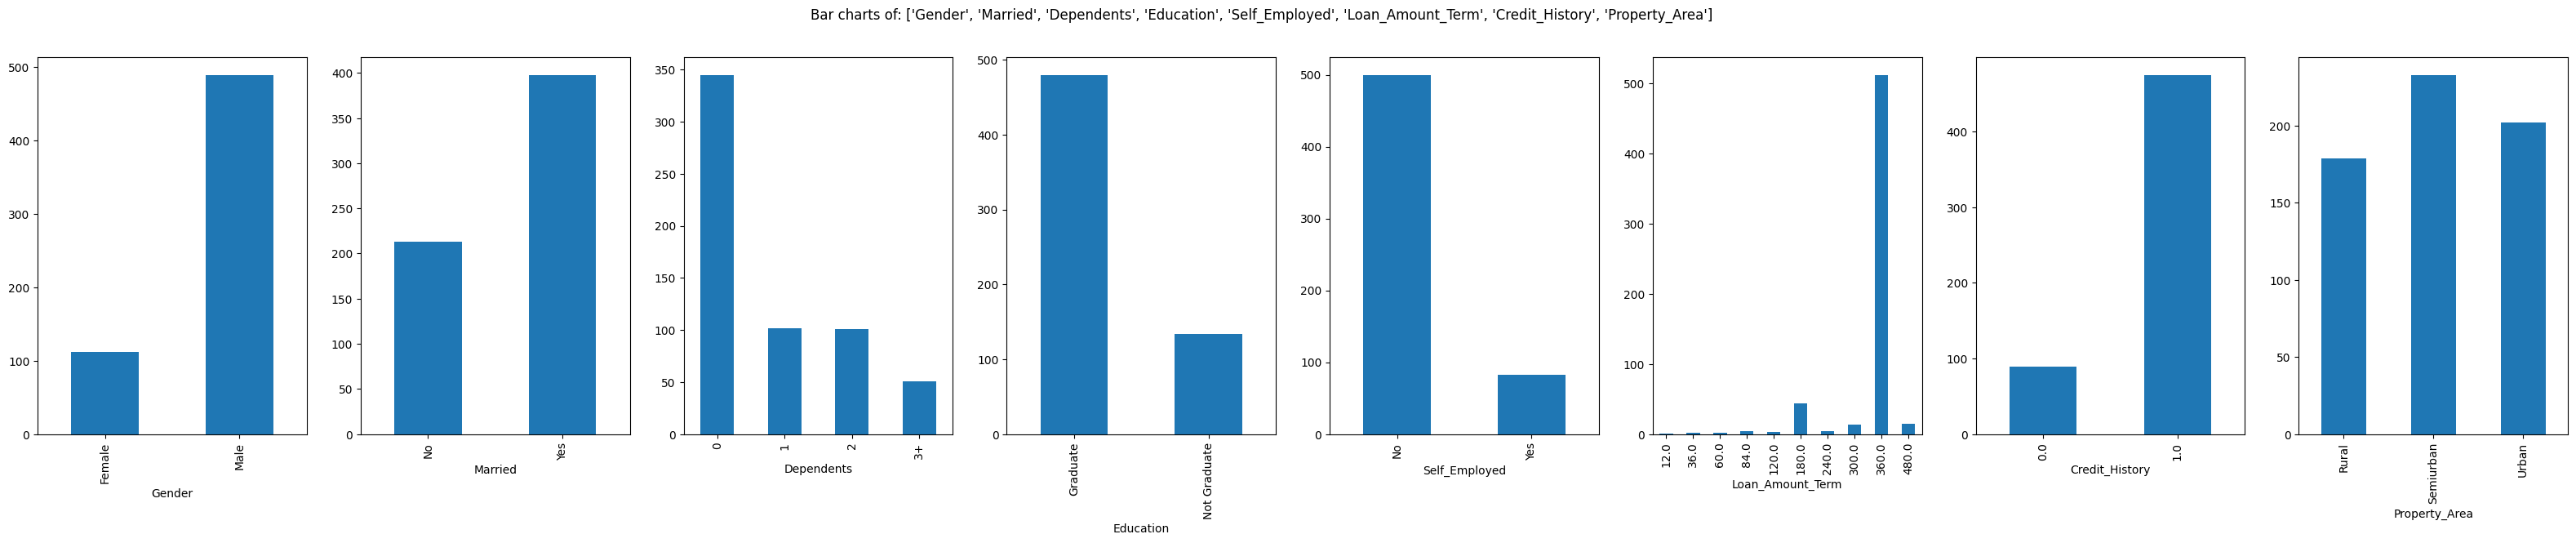

In [14]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

#####################################################################
# Calling the function
PlotBarCharts(inpData=Loandata, colsToPlot=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area'])

## Bar Chart Interpretation:
In this data, all the categorical columns except "Loan_Amount_Term" have satisfactory distribution for machine learning.

## Visualising distribution of all the continuous predictor variables in the data using histograms:

Visualising the continuous predictor variables 'ApplicantIncome','CoapplicantIncome','LoanAmount'

array([[<AxesSubplot: title={'center': 'ApplicantIncome'}>,
        <AxesSubplot: title={'center': 'CoapplicantIncome'}>],
       [<AxesSubplot: title={'center': 'LoanAmount'}>, <AxesSubplot: >]],
      dtype=object)

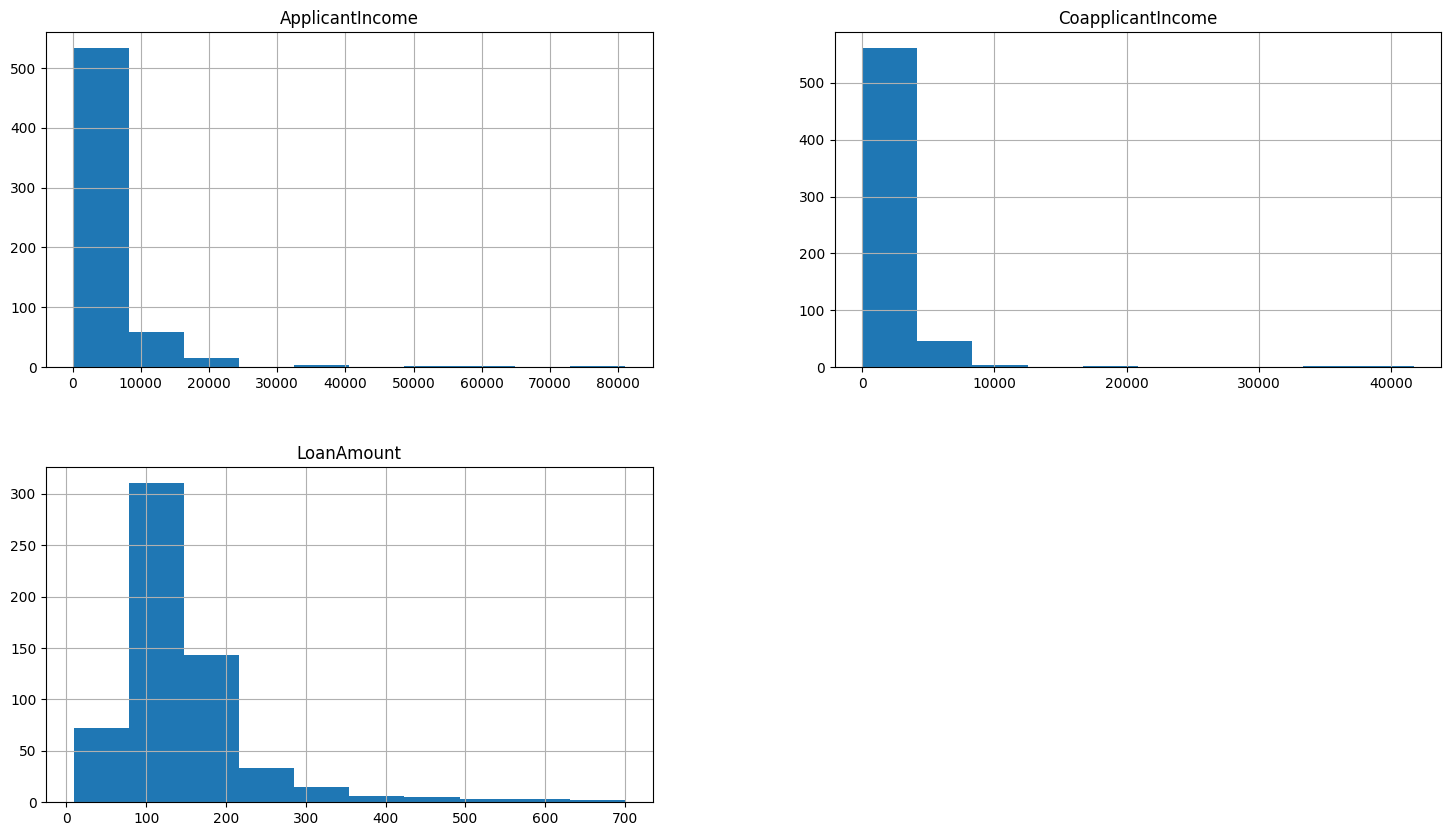

In [15]:
Loandata.hist(['ApplicantIncome', 'CoapplicantIncome','LoanAmount'], figsize=(18,10))

## Histogram Interpretation:

Ideal outcome for the histogram is a bell curve or a slightly skewed bell curve. If there is too much skewness, then the outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then reject the column.

Selected Continuous Variables:

1. ApplicantIncome: Outliers seen beyond 30000
2. CoapplicantIncome: Outliers seen boyond 15000
3. LoanAmount: Slightly skewed distribution

## Outlier treatment:

Outlier are extreme values in the data which are far away from most of the values.

### Finding outliers for ApplicantIncome

In [17]:
# Finding nearest values to 30000 mark for applicant income
Loandata['ApplicantIncome'][Loandata['ApplicantIncome']>20000].sort_values()

130    20166
308    20233
284    20667
506    20833
126    23803
183    33846
443    37719
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, dtype: int64

Replacing any value above 30000 with the nearest value i.e; 23803

In [18]:
Loandata['ApplicantIncome'][Loandata['ApplicantIncome']>30000] = 23803

### Finding outliers for CoapplicantIncome

In [19]:
# Finding nearest values to 15000 mark
Loandata['CoapplicantIncome'][Loandata['CoapplicantIncome']>10000].sort_values()

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

Replacing any value over 15000 with the nearest logical value 11300

In [20]:
Loandata['CoapplicantIncome'][Loandata['CoapplicantIncome']>15000] = 11300

## Visualizing distribution after outlier treatment:

array([[<AxesSubplot: title={'center': 'ApplicantIncome'}>,
        <AxesSubplot: title={'center': 'CoapplicantIncome'}>]],
      dtype=object)

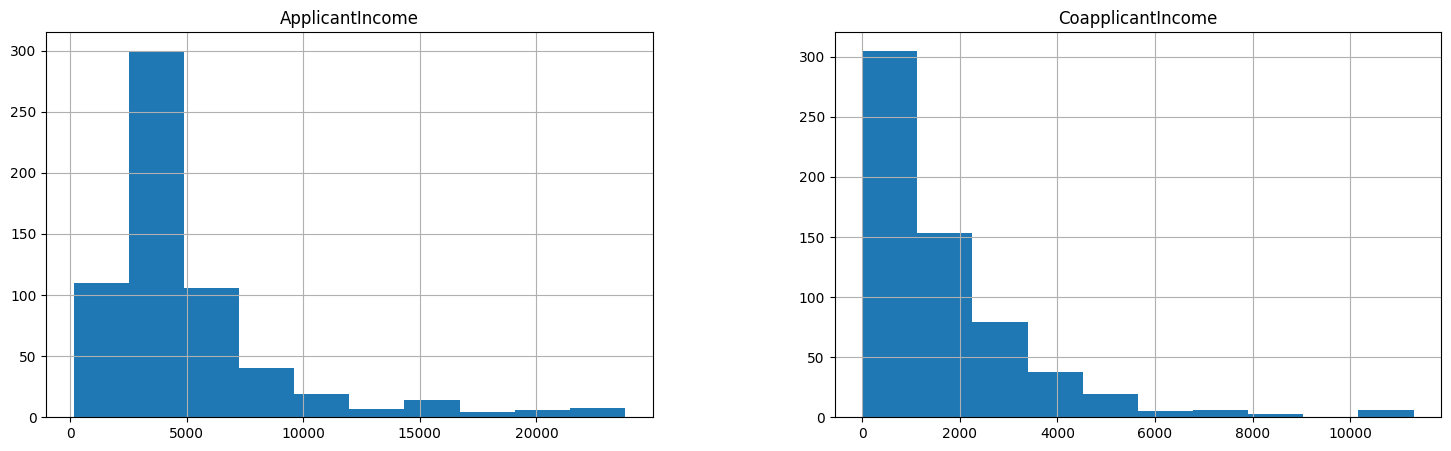

In [21]:
Loandata.hist(['ApplicantIncome', 'CoapplicantIncome'], figsize=(18,5))

## Missing value treatment:

If a column has more than 30% of the data missing, then the missing value treatment cannot be done. The column must be rejected because too much information is missing.

In [22]:
Loandata.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Replacing the missing values with mode values for categorical columns and median values for Qualitative/ Continuous values

In [24]:
# Replacing the missing values
# Using MODE for categorical columns
Loandata['Gender'].fillna(Loandata['Gender'].mode()[0], inplace=True)
Loandata['Married'].fillna(Loandata['Married'].mode()[0], inplace=True)
Loandata['Dependents'].fillna(Loandata['Dependents'].mode()[0], inplace=True)
Loandata['Self_Employed'].fillna(Loandata['Self_Employed'].mode()[0], inplace=True)
# Using Mode value for Loan_Amount_Term since it is a categorical variable
Loandata['Loan_Amount_Term'].fillna(Loandata['Loan_Amount_Term'].mode()[0], inplace=True)
Loandata['Credit_History'].fillna(Loandata['Credit_History'].mode()[0], inplace=True)

# Using Median value for continuous columns
Loandata['LoanAmount'].fillna(Loandata['LoanAmount'].median(), inplace=True)
# Checking missing values again after the treatment
Loandata.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Thus, we can see there are no more missing values.

## Feature Selection:

In this section, we choose the best columns which are correlated to the target variable. This can be done by measuring the correlation values or ANOVA and Chi-Square tests.

## Box Plots:
Below is the box plot for the continuous target variable "Loan_Status" and the continuous predictors

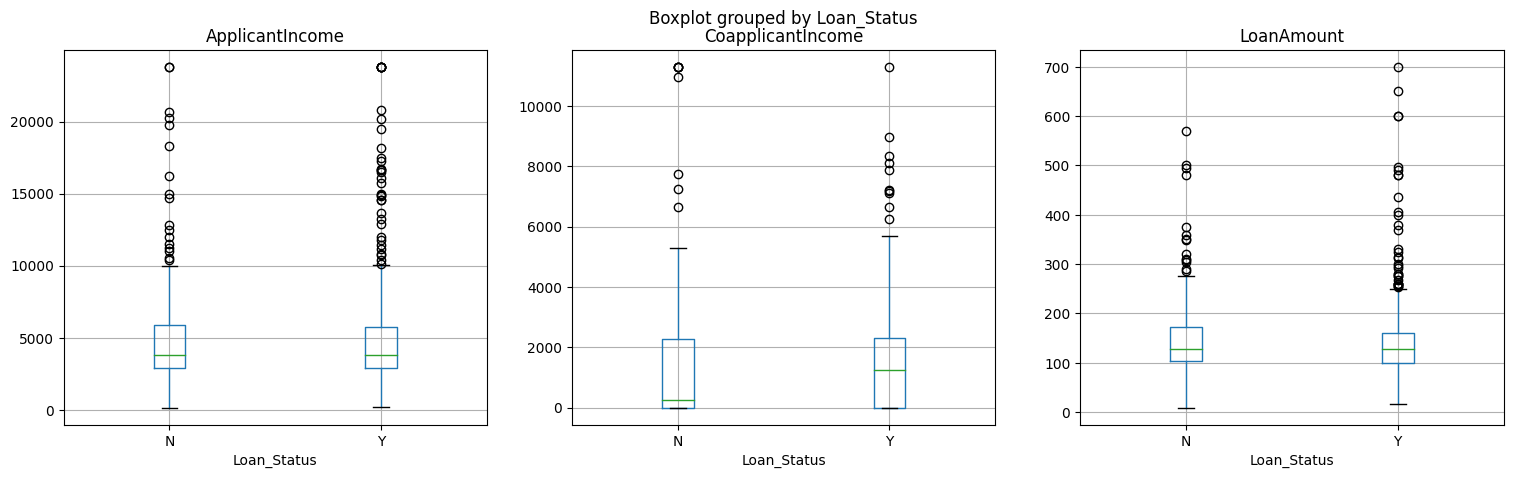

In [25]:
ContinuousColsList=['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Loan_Status"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    Loandata.boxplot(column=PredictorCol, by='Loan_Status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

As it can be seen, the distribution looks identical for all of the continuous variables i.e; the boxes start on the same line. Thus the variables are not correlated to each other.

This can also be confirmed by using the ANOVA test, code of which is given below which has been defined in a function

In [26]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [27]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
FunctionAnova(inpData=Loandata, TargetVariable='Loan_Status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.9529534007092838
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.6651120750168427
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.4113236546779784


[]

## Grouped Bar Charts:

When the target variable is categorical and the predictor variables are also categorical, they can be visualised using bar charts and statistically using Chi-square test.

In [28]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=Loandata['Gender'], columns=Loandata['Loan_Status'])
CrossTabResult

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


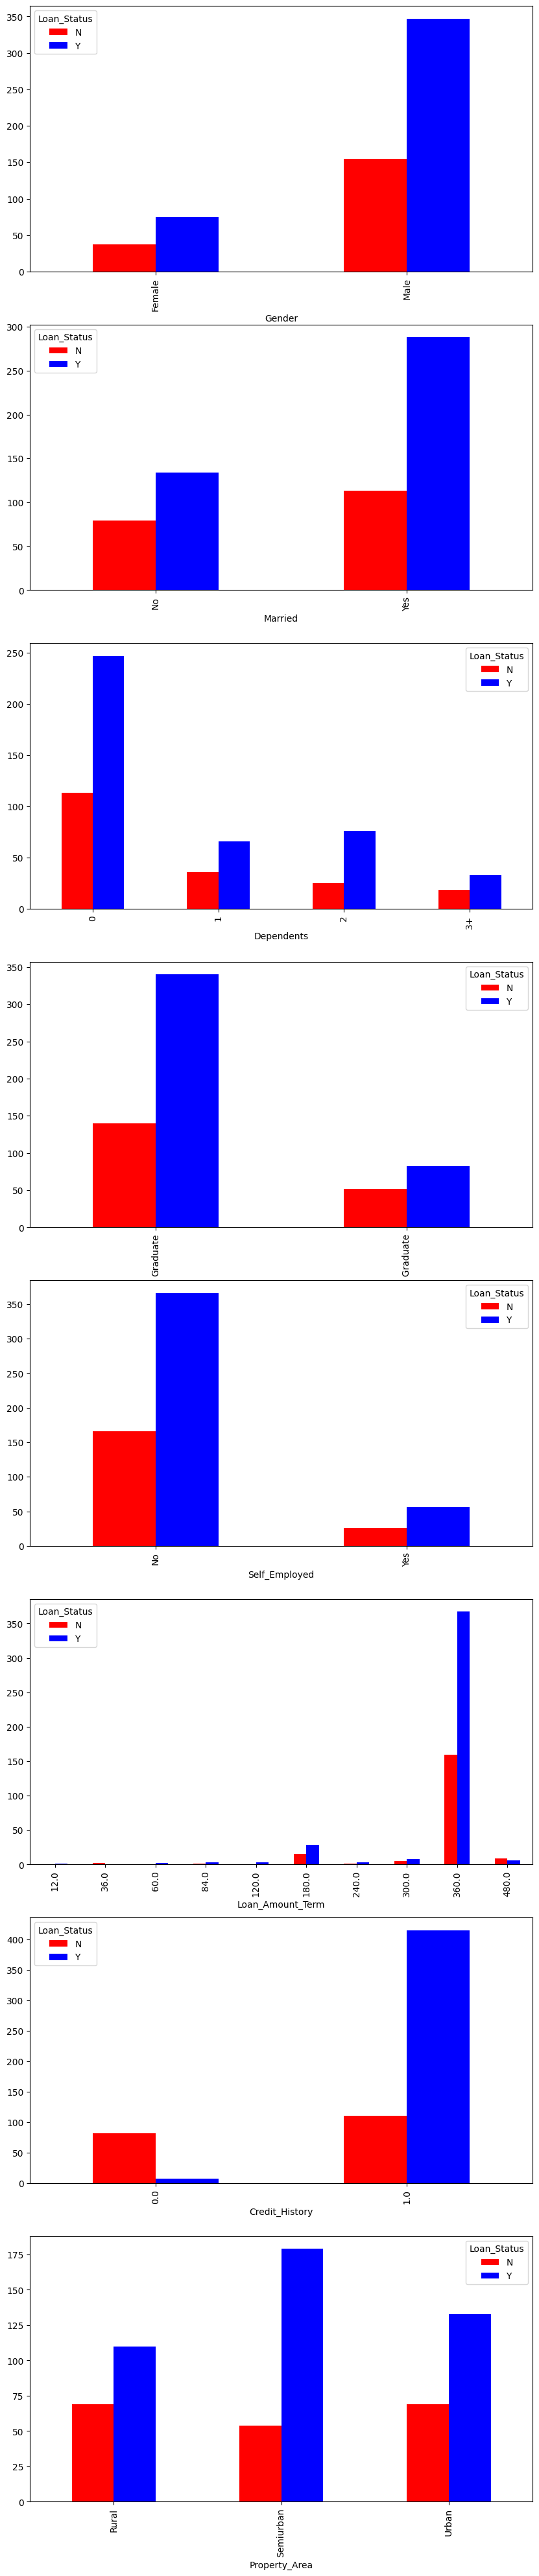

In [29]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Loan_Status"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=Loandata[CategoricalCol], columns=Loandata['Loan_Status'])
    CrossTabResult.plot.bar(color=['red','blue'], ax=PlotCanvas[i])

If the ratio of bars is similar across all categories, then the two columns are not correlated Thus, it can be seen that Married, Education, Credit_History and Property_Area is correlated with Loan_Status.
This can be seen with the Chi-Square test as well.

In [30]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [31]:
CategoricalVariables=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Calling the function
FunctionChisq(inpData=Loandata,
              TargetVariable='Loan_Status',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Loan_Status | P-Value: 0.7391461310869638
Married is correlated with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Loan_Status | P-Value: 0.3688663081366005
Education is correlated with Loan_Status | P-Value: 0.043099621293573545
Self_Employed is NOT correlated with Loan_Status | P-Value: 1.0
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.13058516348934335
Credit_History is correlated with Loan_Status | P-Value: 3.418349997909119e-40
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915


['Married', 'Education', 'Credit_History', 'Property_Area']

## Selecting final predictors for training the model:

In [32]:
SelectedColumns=['Married', 'Education', 'Credit_History', 'Property_Area']

# Selecting final columns
DataForML=Loandata[SelectedColumns]
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban


In [49]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Converting the binary nominal variable to numeric using 1/0 mapping:

In [34]:
# Treating the binary nominal variables first
DataForML['Married'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban


## Converting the nominal variable to numeric using get_dummies()


In [38]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Loan_Status']=Loandata['Loan_Status']

# Printing sample rows
DataForML_Numeric.head()

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,1,1.0,0,0,1,Y
1,1,1,1.0,1,0,0,N
2,1,1,1.0,0,0,1,Y
3,1,0,1.0,0,0,1,Y
4,0,1,1.0,0,0,1,Y


## ML : Splitting the data into Training and Testing sample

70% of the data is randomly used for Training data and the rest 30% is used as Testing data.

In [40]:
# Separate Target Variable and Predictor Variables
TargetVariable='Loan_Status'
Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 6)
(429,)
(185, 6)
(185,)


## Logistic Regression:

I have chosen to use logistic regression for training the model with penalty l2. Over-fitting tends to occur when the fitted model has many feature variables with relatively large weights in magnitude. To prevent this situation we use ridge regression. At a high level, in ridge regression, the loss function or the residual sum of squares is minimized by adding a shrinkage quantity. The ridge regression makes use of lambda, which acts as a tuning parameter for the model. As the value of the lambda increases, the coefficient estimates tend toward 0.

In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           N       0.97      0.43      0.60        74
           Y       0.72      0.99      0.84       111

    accuracy                           0.77       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.77      0.74       185

[[ 32  42]
 [  1 110]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


Trained the model using the training data using logistic regression and constructed the confusion matrix, along with calculating the precision, accuracy, f1 score and support. Further, we perform 10- fold cross validation to determine the accuracy values.

We get the final average accuracy of the model to be 0.78

## Deployment of the model:

Training the model with 100% of the data available and saving the file as a pickle file to be utilized everywhere.

In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
# Training the model on 100% Data available
LogisticRegressionModel=clf.fit(X,y)

In [44]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('LogisticRegressionModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(LogisticRegressionModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\yohaa\OneDrive\Desktop\Internship Applicant Dev


## Creating a python function to allow easy access:

In [50]:
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the binary nominal variables first
    InputLoanDetails['Married'].replace({'Yes':1, 'No':0}, inplace=True)
    InputLoanDetails['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Married', 'Education', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]    
    

    
    # Loading the Function from pickle file
    import pickle
    with open('LogisticRegressionModel.pkl', 'rb') as fileReadStream:
        LogRegression_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=LogRegression_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

## Testing of the model with unseen inputs:

In [51]:

# Calling the function for some loan applications
NewLoanApplications=pd.DataFrame(
data=[['No','Graduate',1,'Urban'],
     ['No','Graduate',0,'Urban'],['Yes','Not Graduate',1,'Rural'],['No','Graduate',0,'Rural']],
columns=['Married','Education','Credit_History','Property_Area'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  Married     Education  Credit_History Property_Area
0      No      Graduate               1         Urban
1      No      Graduate               0         Urban
2     Yes  Not Graduate               1         Rural
3      No      Graduate               0         Rural


,Predicted Status
0,Y
1,N
2,Y
3,N


## Conclusion:

Thus, we can see that the model has predicted the loan status for the new unseen inputs and can determine if the loan can be given to the applicant or not based on the input parameters being:

1. Married
2. Education
3. Credit History
4. Property Area